In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin, tmax, 1000)
    if tlabel:
        plt.xlabel(tlabel, fontsize=18)
    if xlabel:
        plt.ylabel(xlabel, fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax - tmin
        plt.plot([tmin-total_t/10, tmax+total_t/10], [0,0], c='k', linewidth=1)
        plt.xlim(tmin-total_t/10, tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0], [xmin, xmax], c='k', linewidth=1)
        plt.ylim(xmin, xmax)

In [2]:
def plot_volume(f, tmin, tmax, axes=False, **kwargs):
    plot_function(f, tmin, tmax, tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f, tmin, tmax, axes=False, **kwargs):
    plot_function(f, tmin, tmax, tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [3]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

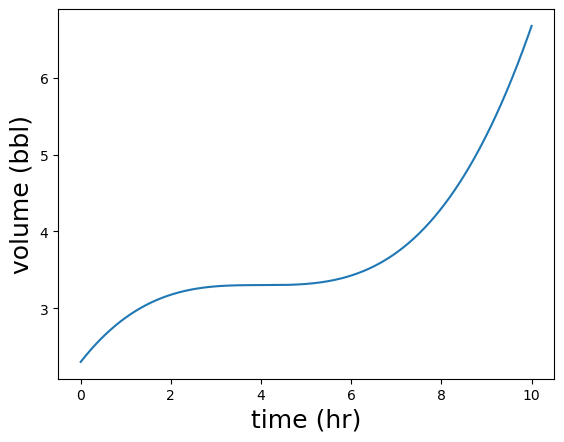

In [4]:
plot_volume(volume, 0, 10)

In [5]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

In [6]:
volume(4)

3.3

In [7]:
volume(9)

5.253125

In [8]:
average_flow_rate(volume, 4, 9)

0.390625

## 8.1.4 Exercises

In [10]:
(77905 - 77641)/4.5

58.666666666666664

In [11]:
def secant_line(f, x1, x2):
    def line(x):
        return f(x1)+(f(x2)-f(x1))/(x2-x1) * (x-x1)
    return line

In [12]:
def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    plot_function(line, x1, x2, c=color)
    plt.scatter([x1,x2],[f(x1), f(x2)], c=color, marker='o')

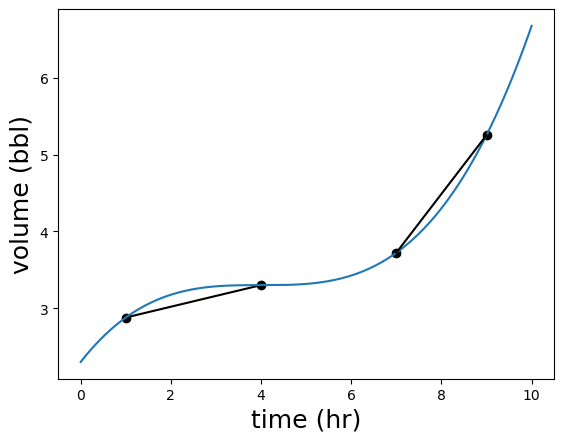

In [13]:
plot_secant(volume, 1, 4)
plot_volume(volume, 0, 10)
plot_secant(volume, 7, 9)

In [14]:
import numpy as np

In [15]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [16]:
def interval_flow_rates(v, t1, t2, dt):
    return [(t, average_flow_rate(v, t, t+dt)) for t in np.arange(t1,t2, dt)]

In [17]:
interval_flow_rates(volume, 0, 10, 1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

In [18]:
def plot_interval_flow_rates(volume, t1, t2, dt):
    series = interval_flow_rates(volume, t1, t2, dt)
    times = [t for (t, _) in series]
    rates = [r for (_, r) in series]
    plt.scatter(times, rates)

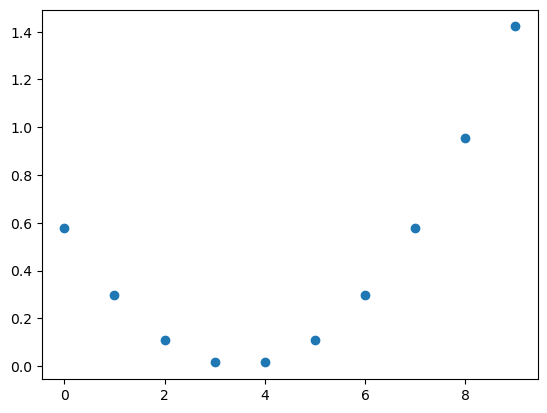

In [19]:
plot_interval_flow_rates(volume, 0, 10, 1)

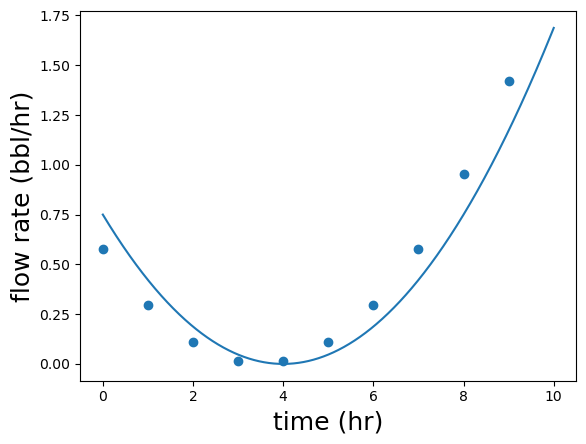

In [20]:
plot_interval_flow_rates(volume, 0, 10, 1)
plot_flow_rate(flow_rate, 0, 10)

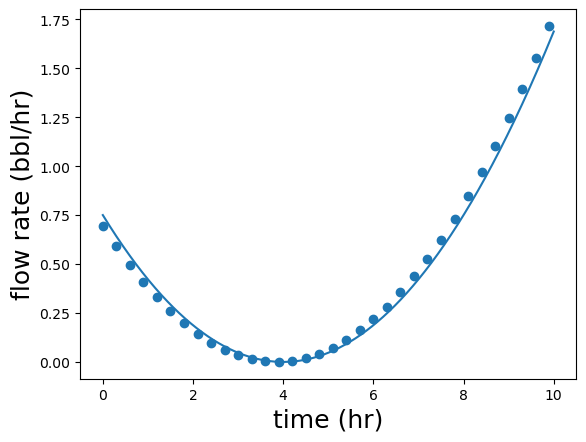

In [21]:
plot_interval_flow_rates(volume, 0, 10, 0.3)
plot_flow_rate(flow_rate, 0, 10)

## 8.2.3 Exercises

In [23]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2


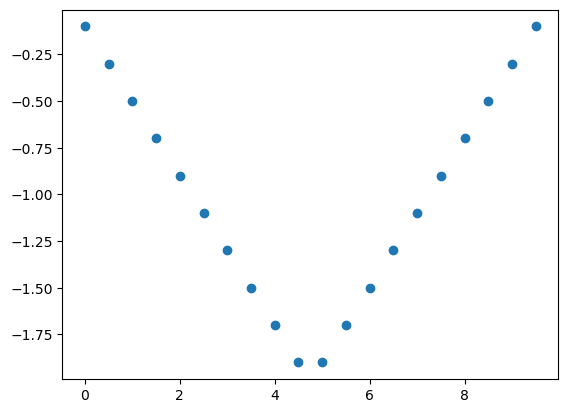

In [24]:
plot_interval_flow_rates(decreasing_volume, 0, 10, 0.5)

In [25]:
def linear_volume_function(t):
    return 5*t + 3

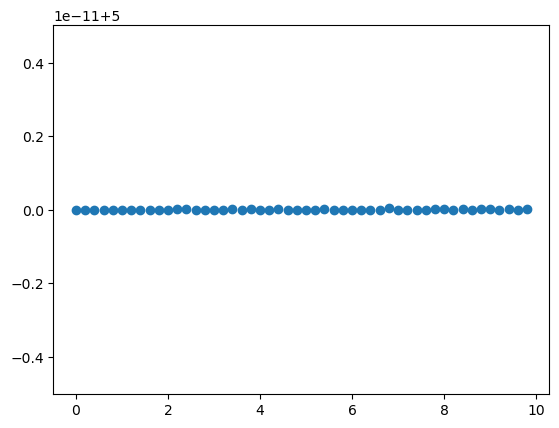

In [26]:
plot_interval_flow_rates(linear_volume_function, 0, 10, 0.2)

In [27]:
def intantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v, t-h, t+h)
    for i in range(0, 2*digits):
        h = h/10
        next_approx = average_flow_rate(v, t-h, t+h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converage")
            

In [28]:
intantaneous_flow_rate(volume, 1)

0.421875

In [29]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        return intantaneous_flow_rate(v, t)
    return flow_rate_function

In [30]:
get_flow_rate_function(volume)(2)

0.1875

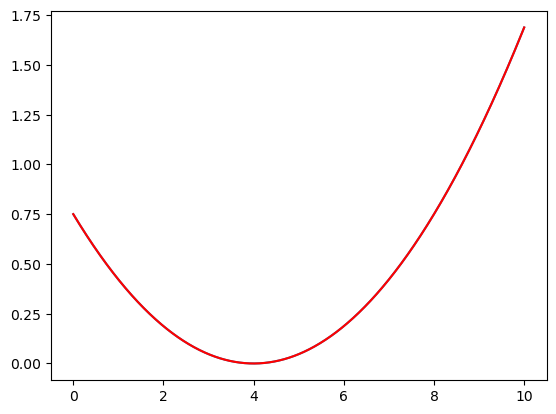

In [31]:
plot_function(get_flow_rate_function(volume), 0, 10)
plot_function(flow_rate, 0, 10, color='red')

In [32]:
average_flow_rate(volume, 7.9, 8.1)

0.7501562500000007

In [33]:
average_flow_rate(volume, 7.99, 8.01)

0.750001562499996

In [34]:
average_flow_rate(volume, 7.999, 8.001)

0.7500000156249458

In [35]:
average_flow_rate(volume, 7.9999, 8.0001)

0.7500000001554312

In [36]:
def sign(x):
    return x/abs(x)

In [37]:
average_flow_rate(sign, -0.1, 0.1)

10.0

In [38]:
average_flow_rate(sign, -0.01, 0.01)

100.0

In [39]:
average_flow_rate(sign, -0.001, 0.001)

1000.0

In [40]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [41]:
small_volume_change(flow_rate, 2, 0.01)

0.001875

In [42]:
volume(2.01) - volume(2)

0.0018656406250001645

In [43]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

In [44]:
volume_change(flow_rate, 0, 10, 0.1)

4.32890625

In [45]:
volume(10) - volume(0)

4.375

In [46]:
volume_change(flow_rate, 0, 6, 0.01)

1.1278171874999996

In [47]:
volume_change(flow_rate, 6, 10, 0.01)

3.2425031249999257

In [48]:
def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

In [49]:
def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

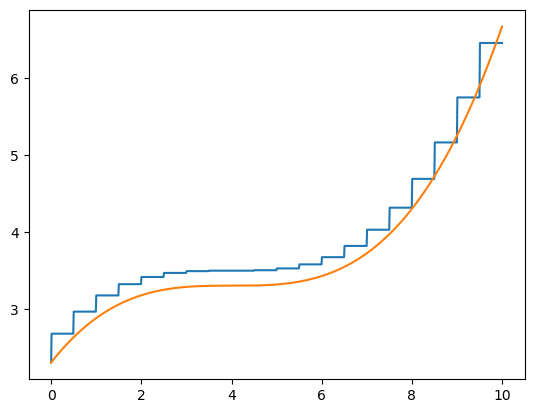

In [50]:
plot_function(approximate_volume_function(flow_rate, 2.3, 0.5), 0, 10)
plot_function(volume, 0, 10)

In [51]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q, 0, T, dt)
        for i in range(0, digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, T, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx, digits)
            else: approx = next_approx
        raise Exception("Did not converage")
    return volume_function

In [52]:
get_volume_function(flow_rate, 2.3, digits=3)(1)

2.878

In [53]:
get_volume_function(flow_rate, 2.3, digits=6)(1)

2.878125

In [54]:
def p(x):
    return x**5

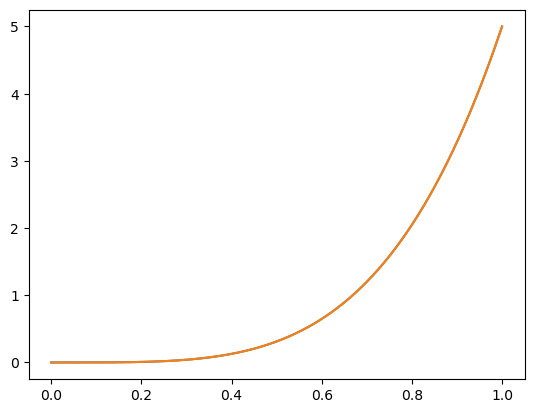

In [112]:
plot_function(get_flow_rate_function(p), 0, 1)
plot_function(lambda x: 5*x**4, 0, 1)